# Code to create figure A.2:
### Colorado Alternate Climate Division Map

Used in the manuscript,  
Evaporative Moisture Sources of Colorado’s Front Range: A Case Study of the Exceptionally Wet May-July Season of 2023

## Import statements and functions

In [5]:
#import statements
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import cartopy.io.shapereader as shpreader

def add_shapefile(path, projection):
    reader = shpreader.Reader(path)
    shapes = list(reader.geometries())
    shapely_shapes = cfeature.ShapelyFeature(shapes, projection)
    return shapely_shapes

## Open all climate division region masks

In [13]:
#modify--------
mask_folder_directory = '/Users/kathum/Research/COPEX/sink_region_files/masks/'
counties_shpfl_directory = "/Users/kathum/Research/COPEX/sink_region_files/sink_region_shp/"
#--------------

region_name = 'Pikes_Peak'
ds_1 = xr.open_dataset(f"{mask_folder_directory}co_AltClimate_{region_name}_source_region.nc")

region_name = 'South_Park'
ds_2 = xr.open_dataset(f"{mask_folder_directory}co_AltClimate_{region_name}_source_region.nc")

region_name = 'Northern_Front_Range'
ds_3 = xr.open_dataset(f"{mask_folder_directory}co_AltClimate_{region_name}_source_region.nc")

region_name = 'Northeast'
ds_4 = xr.open_dataset(f"{mask_folder_directory}co_AltClimate_{region_name}_source_region.nc")

region_name = 'Southeast'
ds_5 = xr.open_dataset(f"{mask_folder_directory}co_AltClimate_{region_name}_source_region.nc")

region_name = 'San_Luis_Valley'
ds_6 = xr.open_dataset(f"{mask_folder_directory}co_AltClimate_{region_name}_source_region.nc")

region_name = 'Northern_Mountains'
ds_7 = xr.open_dataset(f"{mask_folder_directory}co_AltClimate_{region_name}_source_region.nc")

region_name = 'Northwest'
ds_8 = xr.open_dataset(f"{mask_folder_directory}co_AltClimate_{region_name}_source_region.nc")

region_name = 'Mesas_and_Valleys'
ds_9 = xr.open_dataset(f"{mask_folder_directory}co_AltClimate_{region_name}_source_region.nc")

region_name = 'Central_Mountains'
ds_10 = xr.open_dataset(f"{mask_folder_directory}co_AltClimate_{region_name}_source_region.nc")

region_name = 'Southwest'
ds_11 = xr.open_dataset(f"{mask_folder_directory}co_AltClimate_{region_name}_source_region.nc")

a = (ds_1['source_region']*1+
    ds_2['source_region']*2+
    ds_3['source_region']*3+
    ds_4['source_region']*4+
    ds_5['source_region']*5+
    ds_6['source_region']*6+
    ds_7['source_region']*7+
    ds_8['source_region']*8+
    ds_9['source_region']*9+
    ds_10['source_region']*10+
    ds_11['source_region']*11)

CO_counties = add_shapefile(f'{counties_shpfl_directory}lm_cnty/lm_cnty.shp',ccrs.PlateCarree())
counties = add_shapefile(f'{counties_shpfl_directory}tl_2023_us_county/tl_2023_us_county.shp',ccrs.PlateCarree())

## Plotting

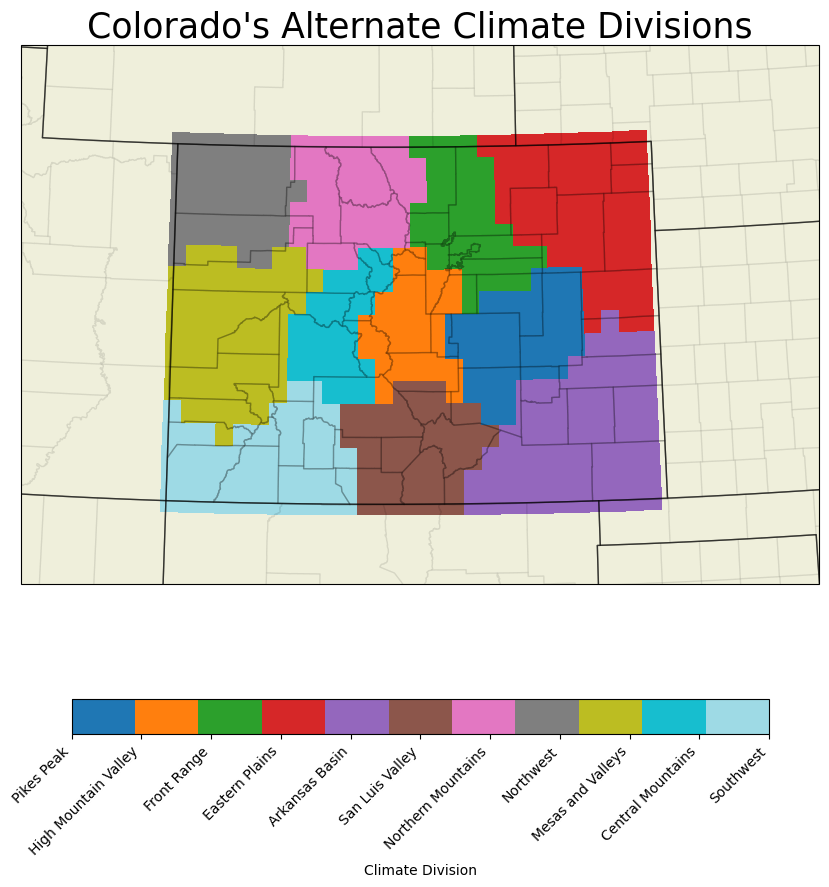

In [11]:
region_names = [
    'Pikes Peak',
    'High Mountain Valley',
    'Front Range',
    'Eastern Plains',
    'Arkansas Basin',
    'San Luis Valley',
    'Northern Mountains',
    'Northwest',
    'Mesas and Valleys',
    'Central Mountains',
    'Southwest']

fig, ax = plt.subplots(figsize=(15, 10),
                       subplot_kw={'projection': ccrs.LambertConformal(central_longitude=-106)})
ax.set_extent([-111, -100, 36, 42], crs=ccrs.PlateCarree())

# Add shapefiles
ax.add_feature(counties, facecolor='none', edgecolor='black', alpha=0.05)
ax.add_feature(CO_counties, facecolor='none', edgecolor='black', alpha=0.15)

# Plot and get the QuadMesh object
mesh = a.where(a != 0).plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap=plt.get_cmap('tab20', 11),
    add_colorbar=True,
    cbar_kwargs={
        'label': "Climate Division",
        'orientation': 'horizontal',
        'spacing': 'uniform',
        'ticks': list(range(1, 12)),  # 1 through 11
        'shrink': 0.6})

# Replace tick labels with region names
cbar = mesh.colorbar
cbar.ax.set_xticklabels(region_names, rotation=45, ha='right')

# Background & extras
ax.set_facecolor('#efefdb')
ax.add_feature(cartopy.feature.STATES.with_scale('10m'), alpha=0.5)
plt.title("Colorado's Alternate Climate Divisions", size=25)

plt.savefig('/Users/kathum/Research/COPEX/figures/all_sink_region_map_named.png', bbox_inches='tight', dpi=300)
